In [1]:
import tensorflow as tf
import numpy as np
import cv2  # For image processing

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/unet_brain.h5")

In [2]:
def preprocess_image(image_path, target_size=(256, 256)):
    """Load and preprocess an MRI image."""
    image = cv2.imread(image_path)  # Read image
    image = cv2.resize(image, target_size)  # Resize
    image = image / 255.0  # Normalize (if required)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [3]:
image_path = "/content/drive/MyDrive/Colab Notebooks/augmented_dataset/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_13.tif"  # Change this to your MRI image path
input_image = preprocess_image(image_path)

# Get segmentation mask (predicted)
predicted_mask = model.predict(input_image)

# Convert output to a binary mask (0 or 1)
predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Thresholding

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


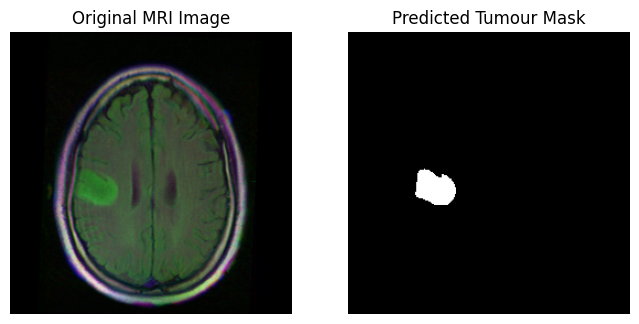

In [4]:
import matplotlib.pyplot as plt

def display_result(original_image_path, mask):
    """Display the original image and its segmentation mask."""
    original = cv2.imread(original_image_path)
    original = cv2.resize(original, (256, 256))

    plt.figure(figsize=(8, 4))

    # Original MRI image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original MRI Image")
    plt.axis("off")

    # Predicted Segmentation Mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask[0, :, :, 0], cmap="gray")
    plt.title("Predicted Tumour Mask")
    plt.axis("off")

    plt.show()

# Display the results
display_result(image_path, predicted_mask)